#Importing libraries and models

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from termcolor import colored
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

#Importing the dataset

In [ ]:
data=pd.read_csv("/content/parkinsons.data")

Understanding the dataset

In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data.isna().sum() #Checking if there are NANs (missing values) in the dataset

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
data.duplicated().sum() #Checking if there are duplicated rows in the dataset

0

In [ ]:
data["status"].value_counts() #The Dataset is biased towards the (M)alignant category

1    147
0     48
Name: status, dtype: int64

#Data Visualization

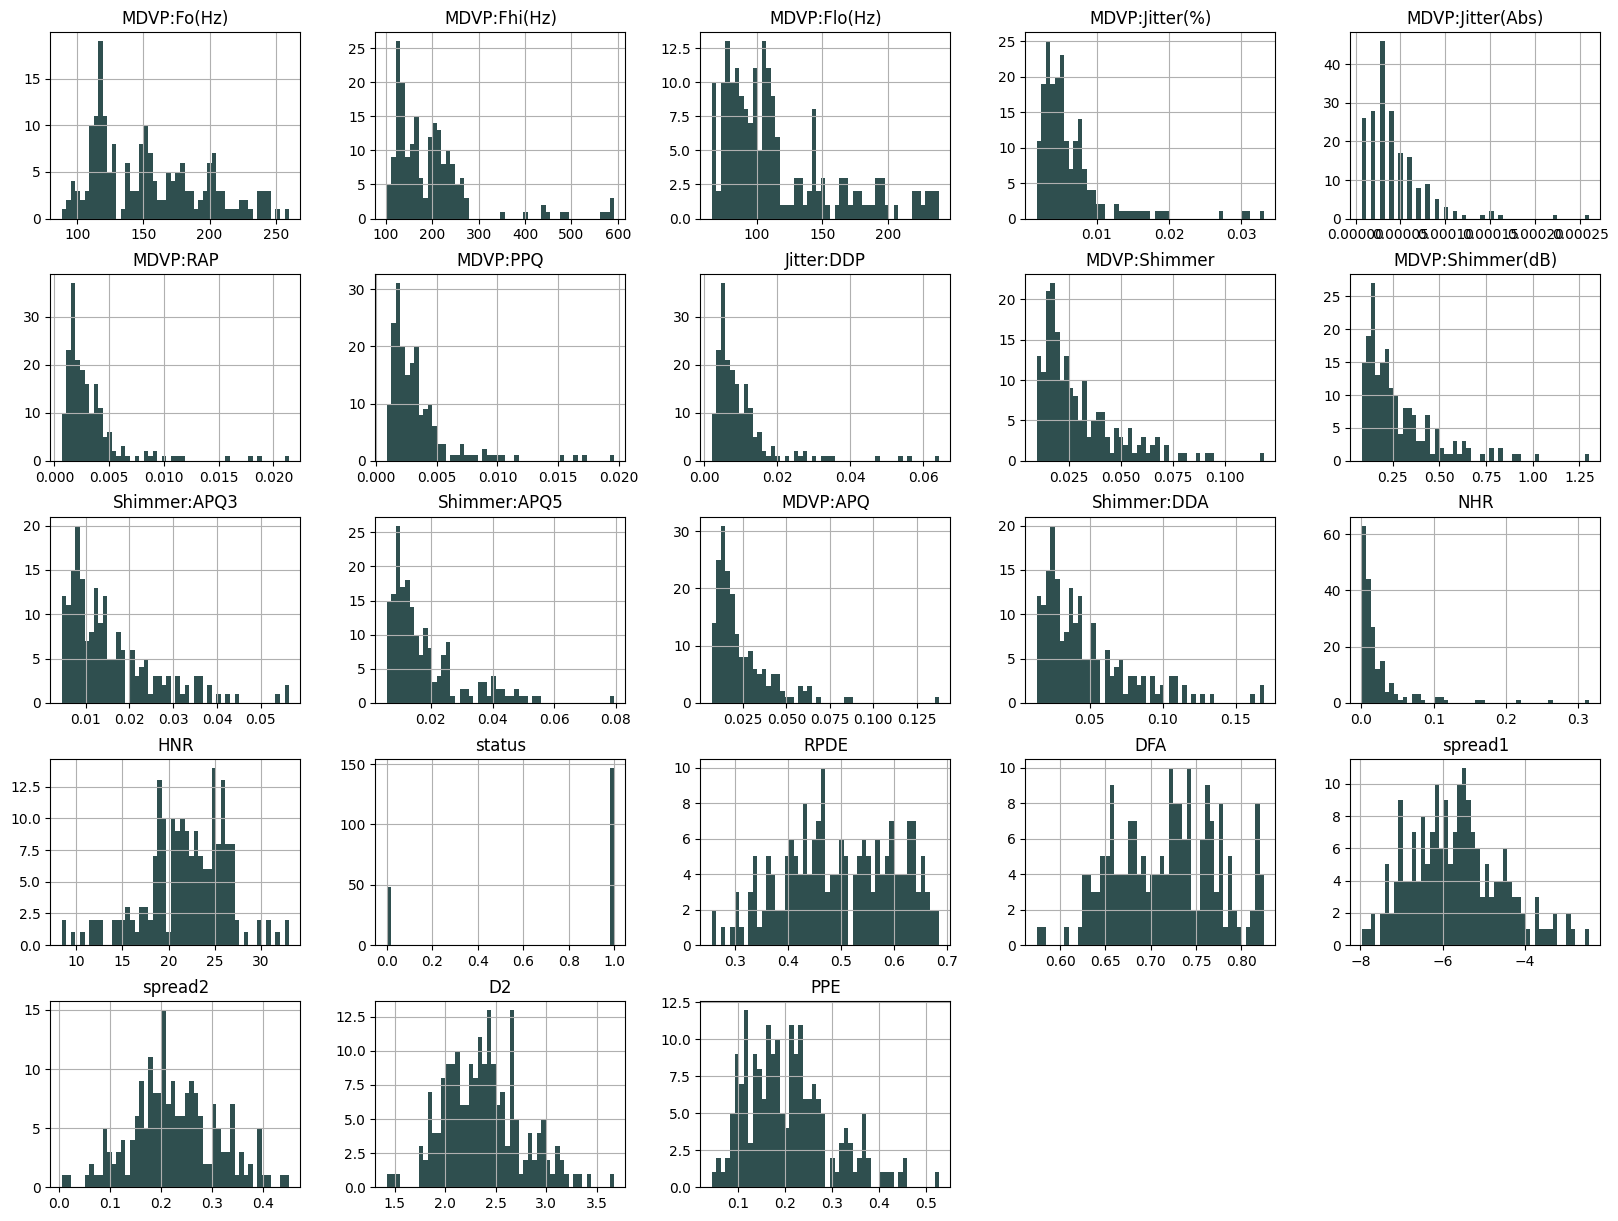

In [ ]:
data.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

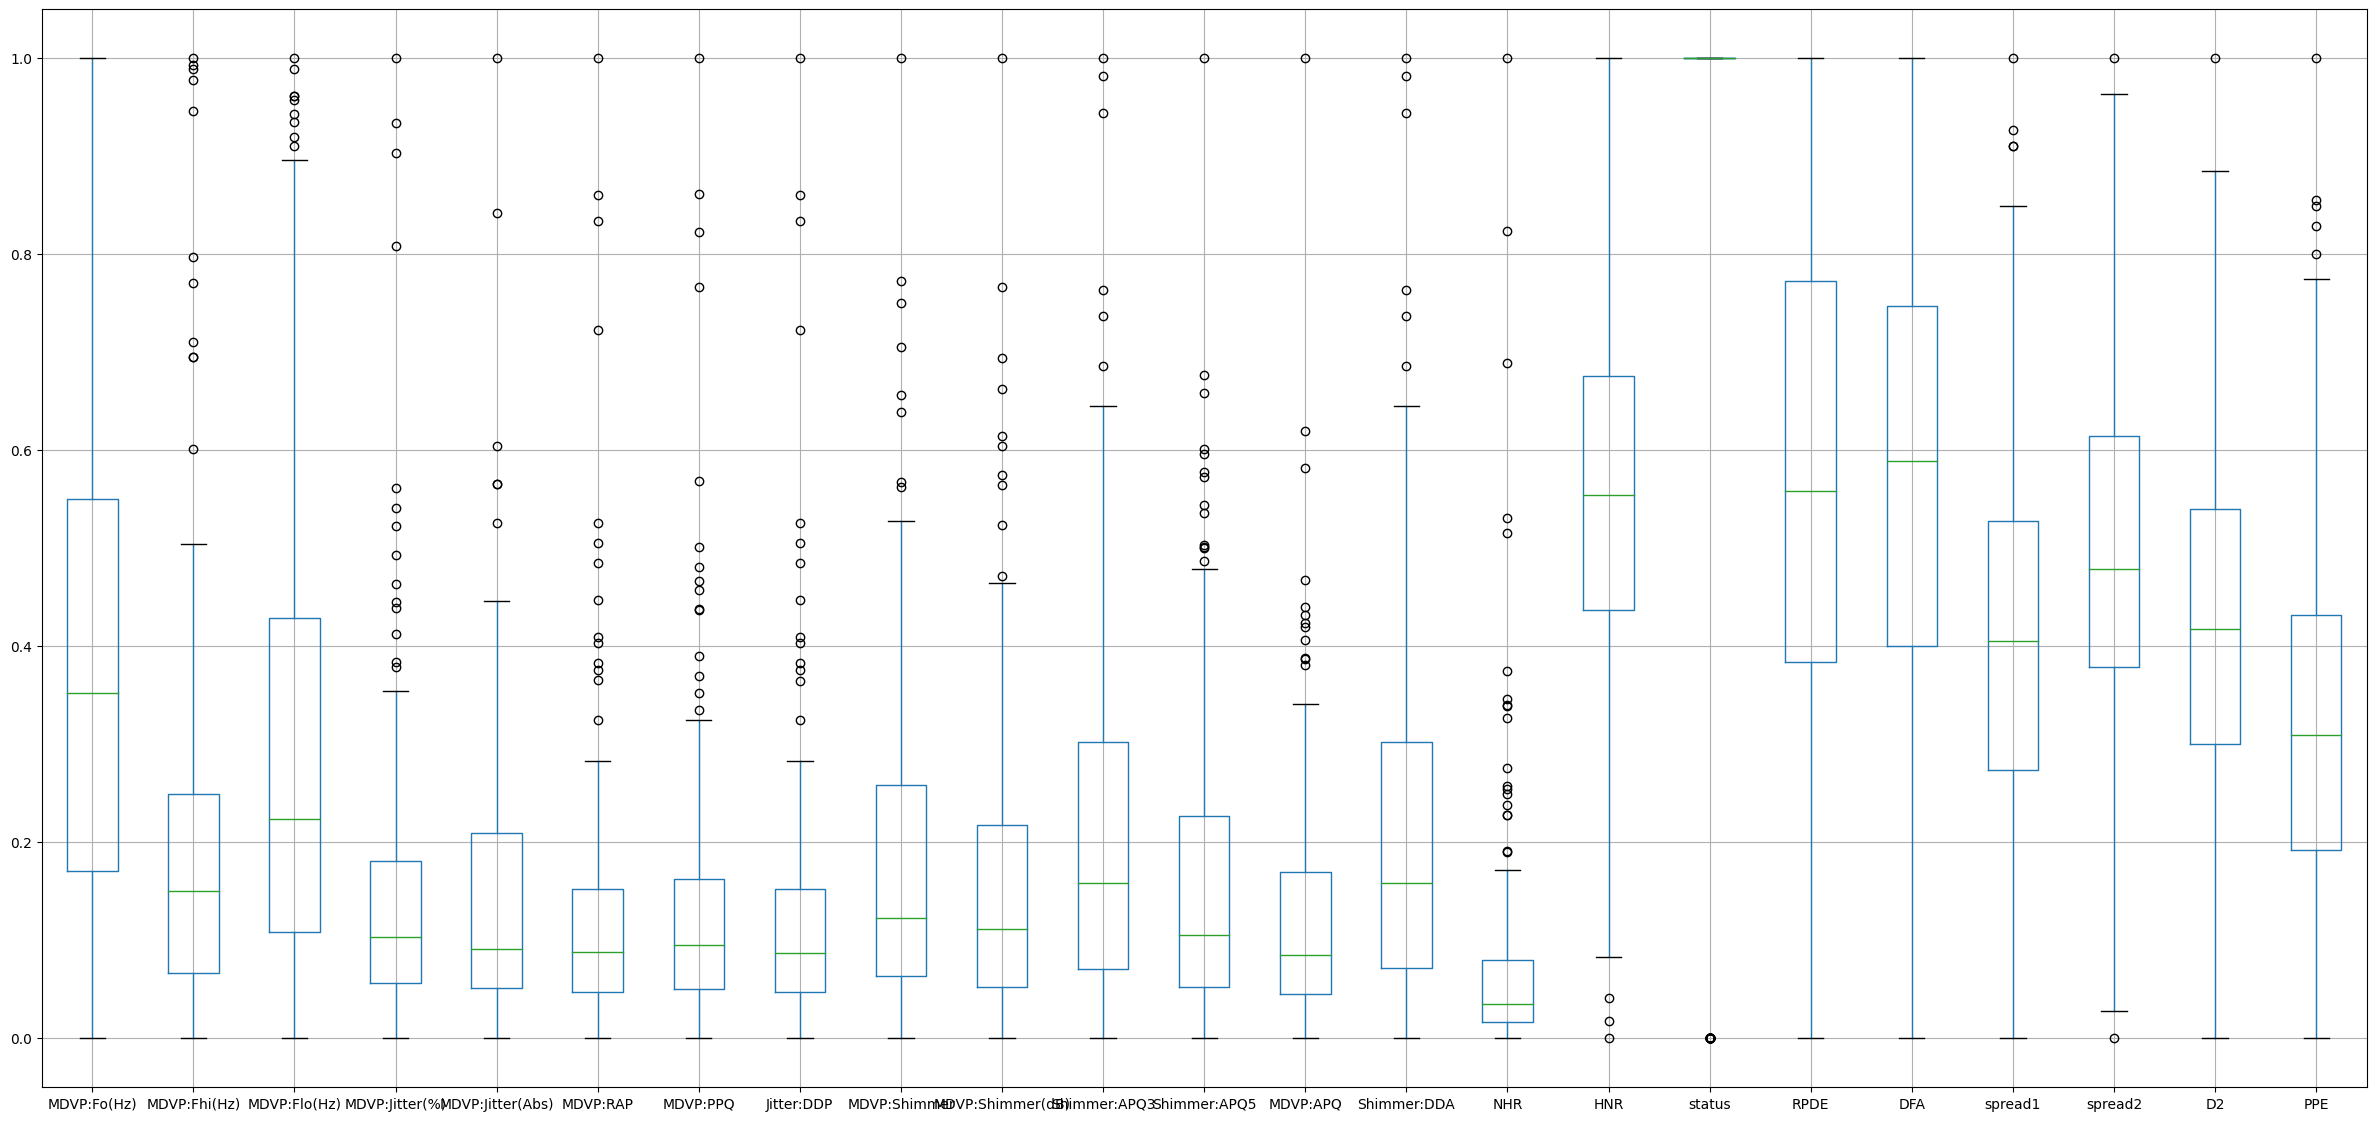

In [ ]:
minmax = MinMaxScaler()
data_boxplot = data.drop(['name'],axis=1)
data_boxplot = minmax.fit_transform(data_boxplot)
boxplot = pd.DataFrame(data_boxplot, columns = data.drop(['name'],axis=1).columns)
boxplot.boxplot(figsize=(30,14))
plt.show(block=False)

<ipython-input-18-00278e57686f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = 'Greens',annot_kws={'size':19})


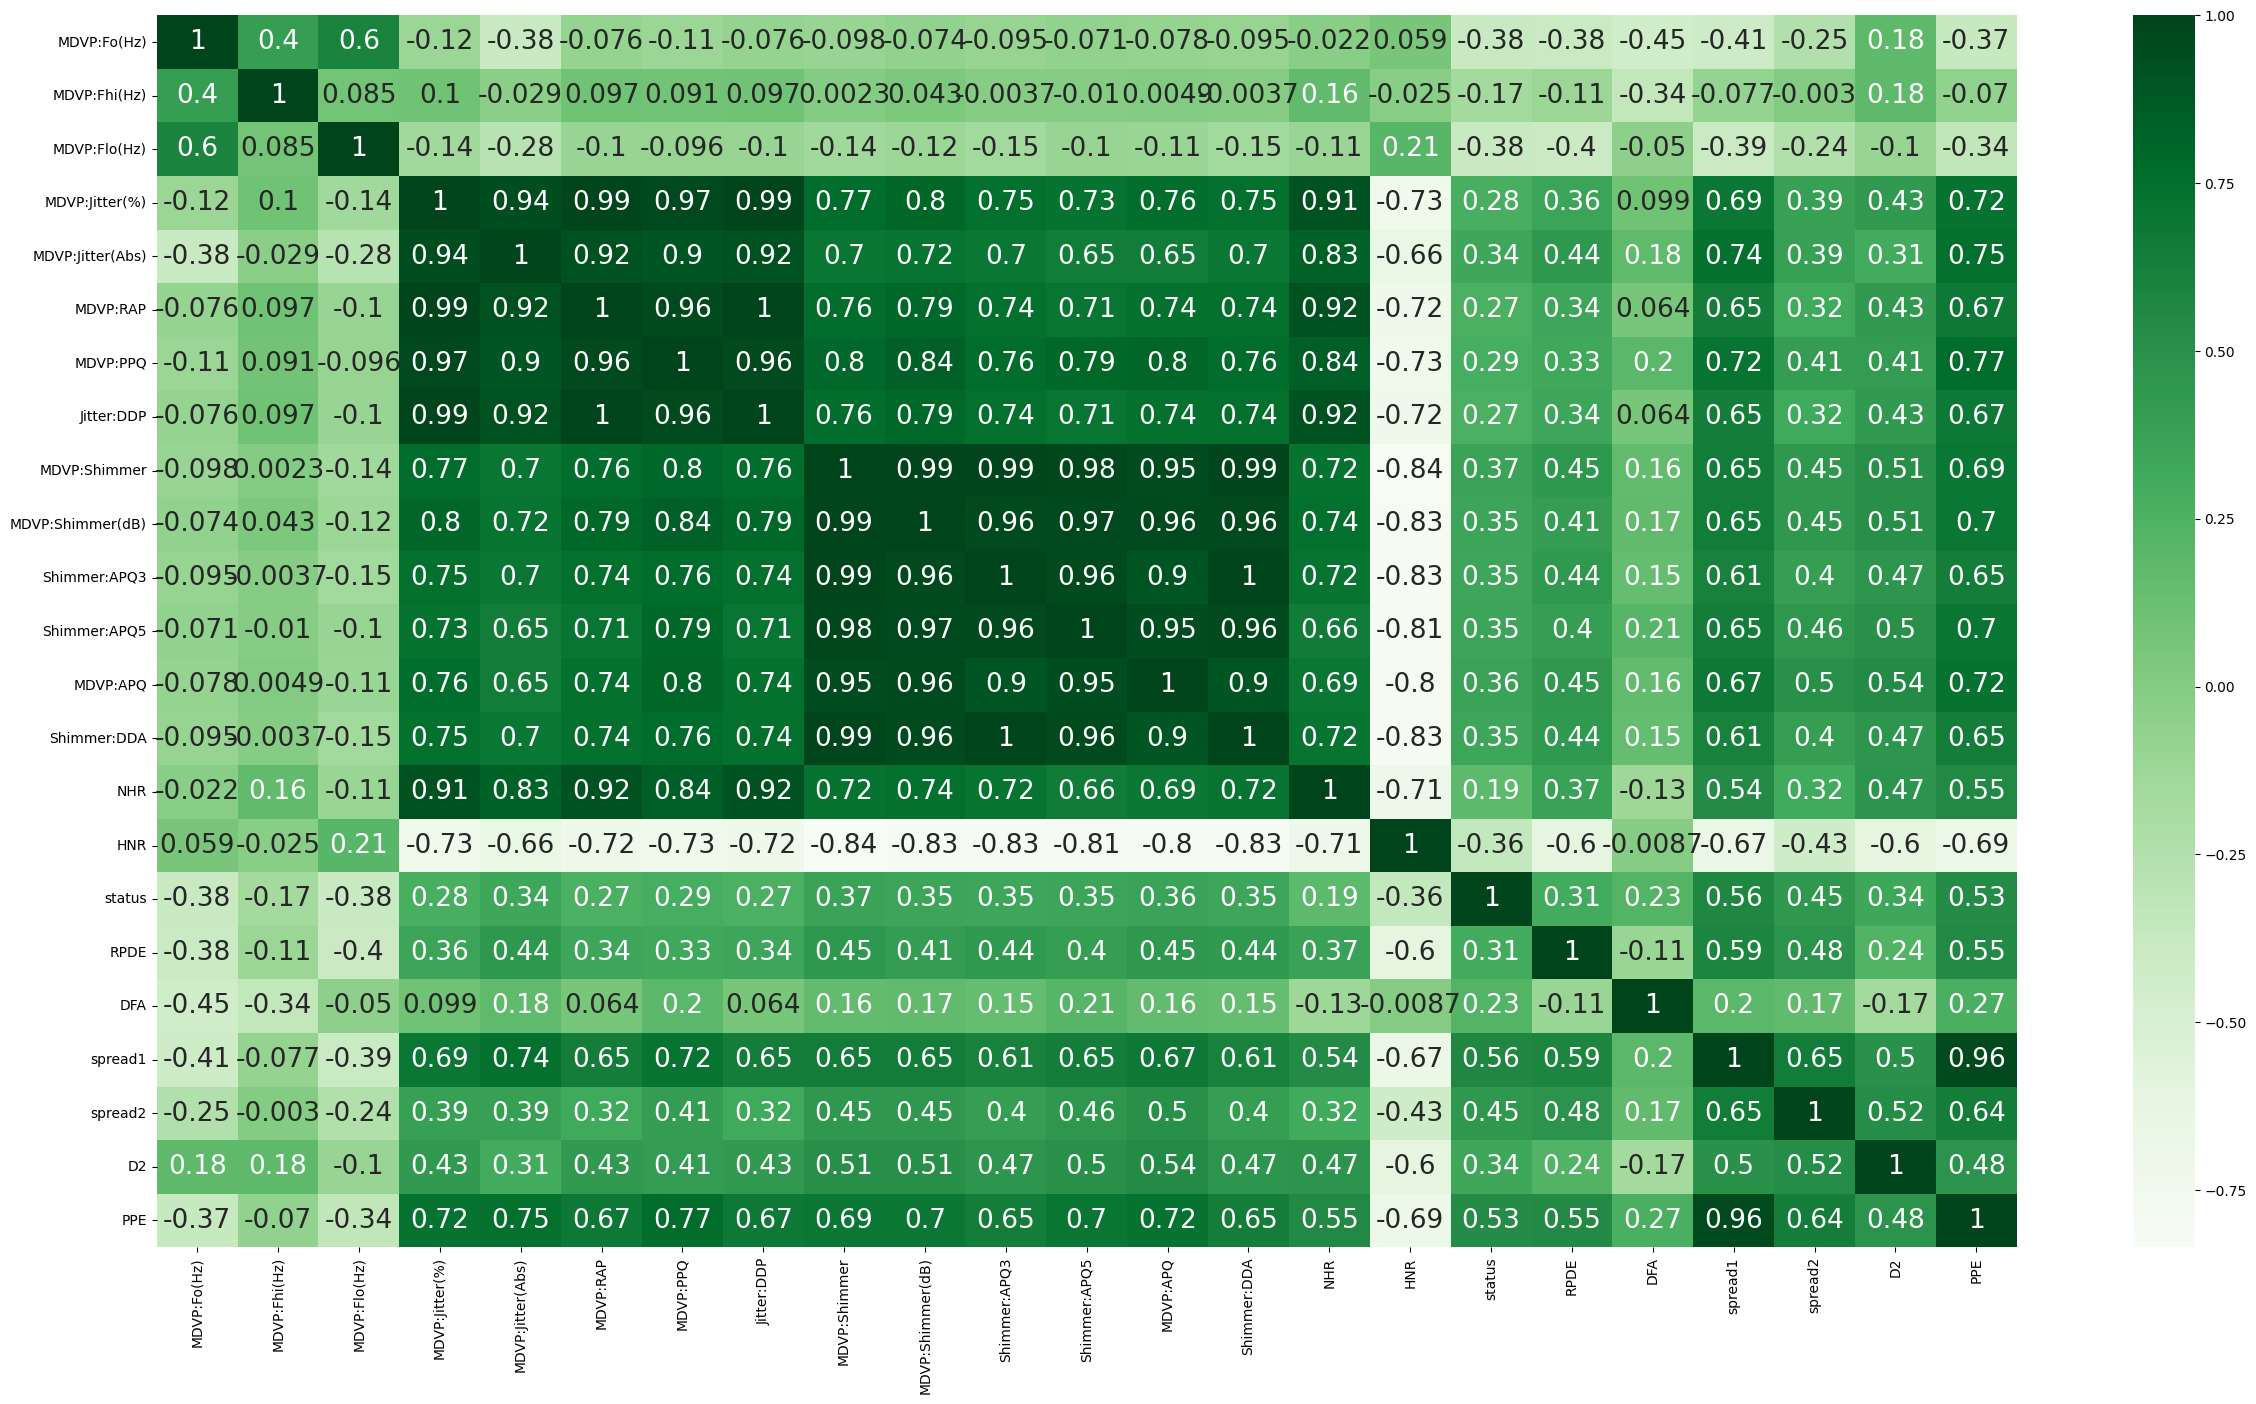

In [ ]:
plt.figure(figsize=(30,16))
sns.heatmap(data.corr(), annot = True, cmap = 'Greens',annot_kws={'size':19})
plt.show()

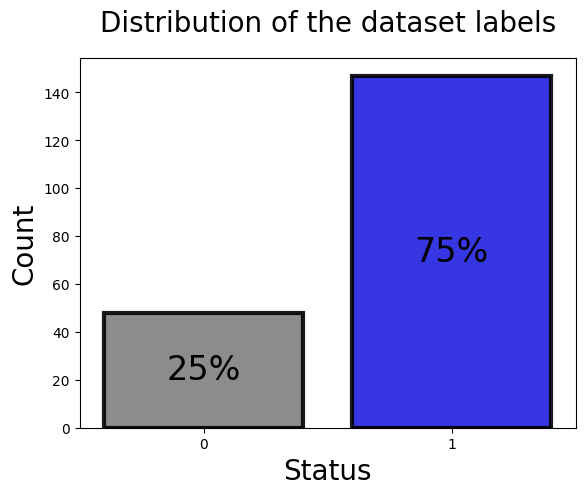

In [ ]:
fig = sns.countplot(data, x='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(data['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)

fig.set_xlabel('Status', fontsize=20)
fig.set_ylabel('Count', fontsize=20 )

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20)
plt.show()


#Data Preprocessing

In [ ]:
X=data.drop(['name','status'],axis=1)
y=data["status"]

In [ ]:
#Balancing the dataset
smote_sampler = SMOTE(random_state=42)
X_smote, y_smote = smote_sampler.fit_resample(X, y)
smote_data = pd.concat([X_smote, y_smote], axis=1)
smote_data.shape

(294, 23)

In [ ]:
len(smote_data[smote_data.status==1].value_counts())

147

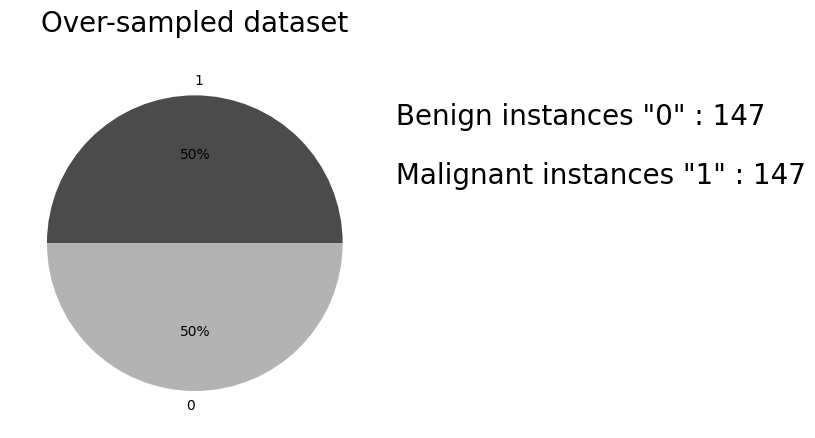

In [ ]:
num_status=smote_data['status'].value_counts()
over_counts = num_status.values
plt.pie(num_status, labels=num_status.index.values, colors=[ (0.29296875,0.29296875,0.29296875), (0.703125,0.703125,0.703125)]
        , autopct='%d%%')
plt.title('Over-sampled dataset', y=1.05, fontsize=20)
plt.text(x=1.3, y=0.8, s=f' Benign instances "0" : {len(smote_data[smote_data.status==0].value_counts())}', fontsize=20)
plt.text(x=1.3, y=0.4, s=f' Malignant instances "1" : {len(smote_data[smote_data.status==1].value_counts())}', fontsize=20)
plt.show(block=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, train_size=0.8, random_state=42)

#Normalization
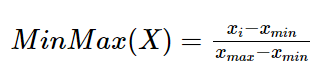

In [ ]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [ ]:
X_smote_train_scaled = minmax.fit_transform(X_smote_train)
X_smote_test_scaled = minmax.transform(X_smote_test)

#Model Selection

In [ ]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20)
    plt.ylabel('True Labels', labelpad=25, fontsize=20)
    plt.show()
    print('-'*80)

# 1st Scenario : where the models will be trained and evaluated on the unbalanced dataset.



#[1] Logistic Regression :

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.26
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


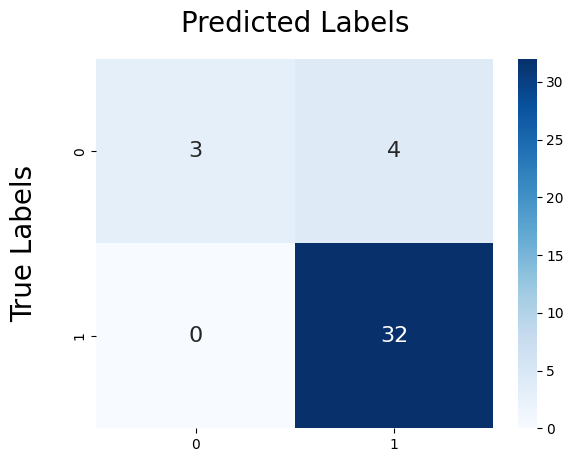

--------------------------------------------------------------------------------


In [ ]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

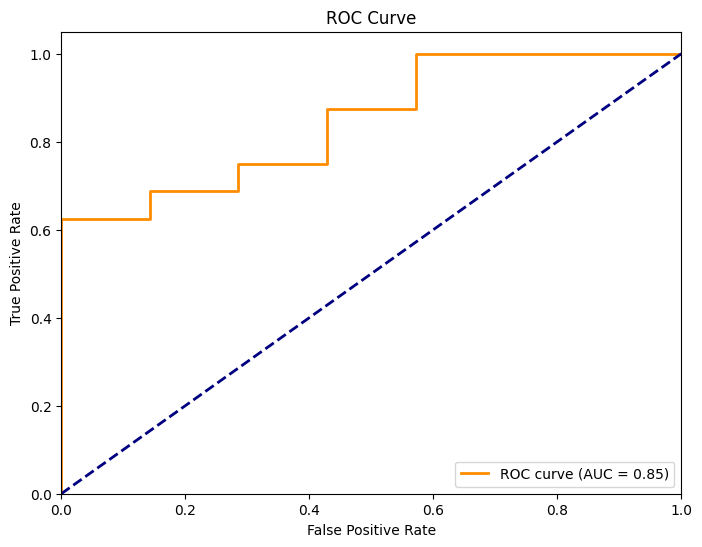

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_LR = LR.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_LR)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_test, y_pred_prob_LR)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#[2] Support Vector Machine :

--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score : 87.67
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


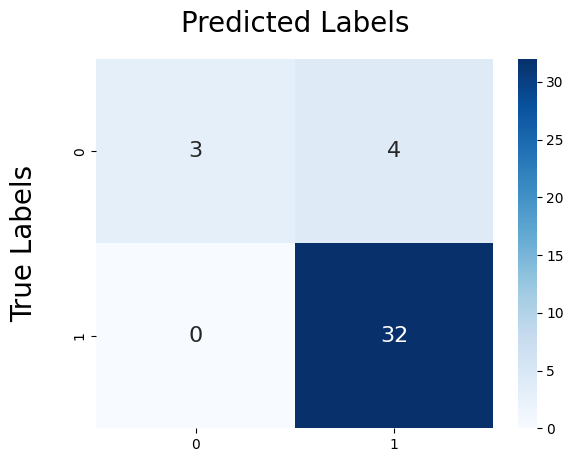

--------------------------------------------------------------------------------


In [ ]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

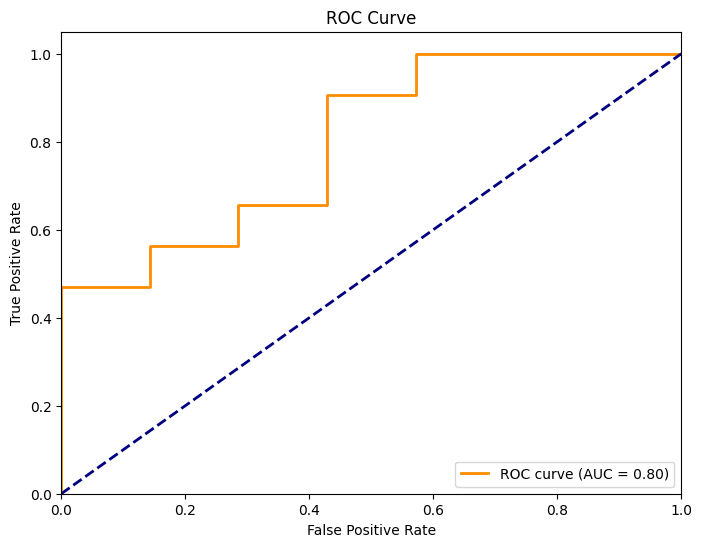

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_SVM = SVM.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_SVM)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_test, y_pred_prob_SVM)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#[3] Decision Tree :

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 85.92
 ❖ Testing Accuracy Score :  92.31
 • Precision Score is : 93.94
 • Recall Score is : 96.88
 • F1-Score Score is : 95.38
--------------------------------------------------------------------------------


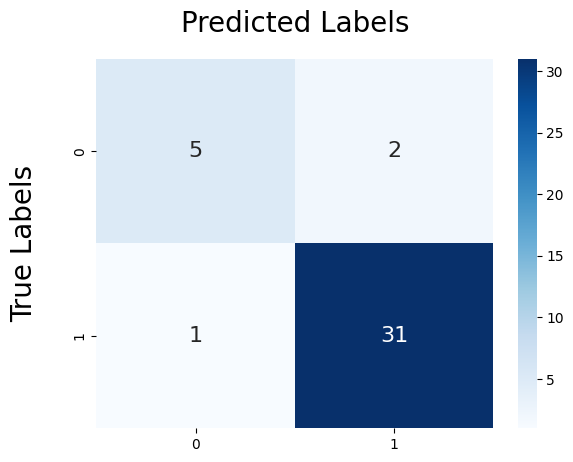

--------------------------------------------------------------------------------


DECISION TREE :


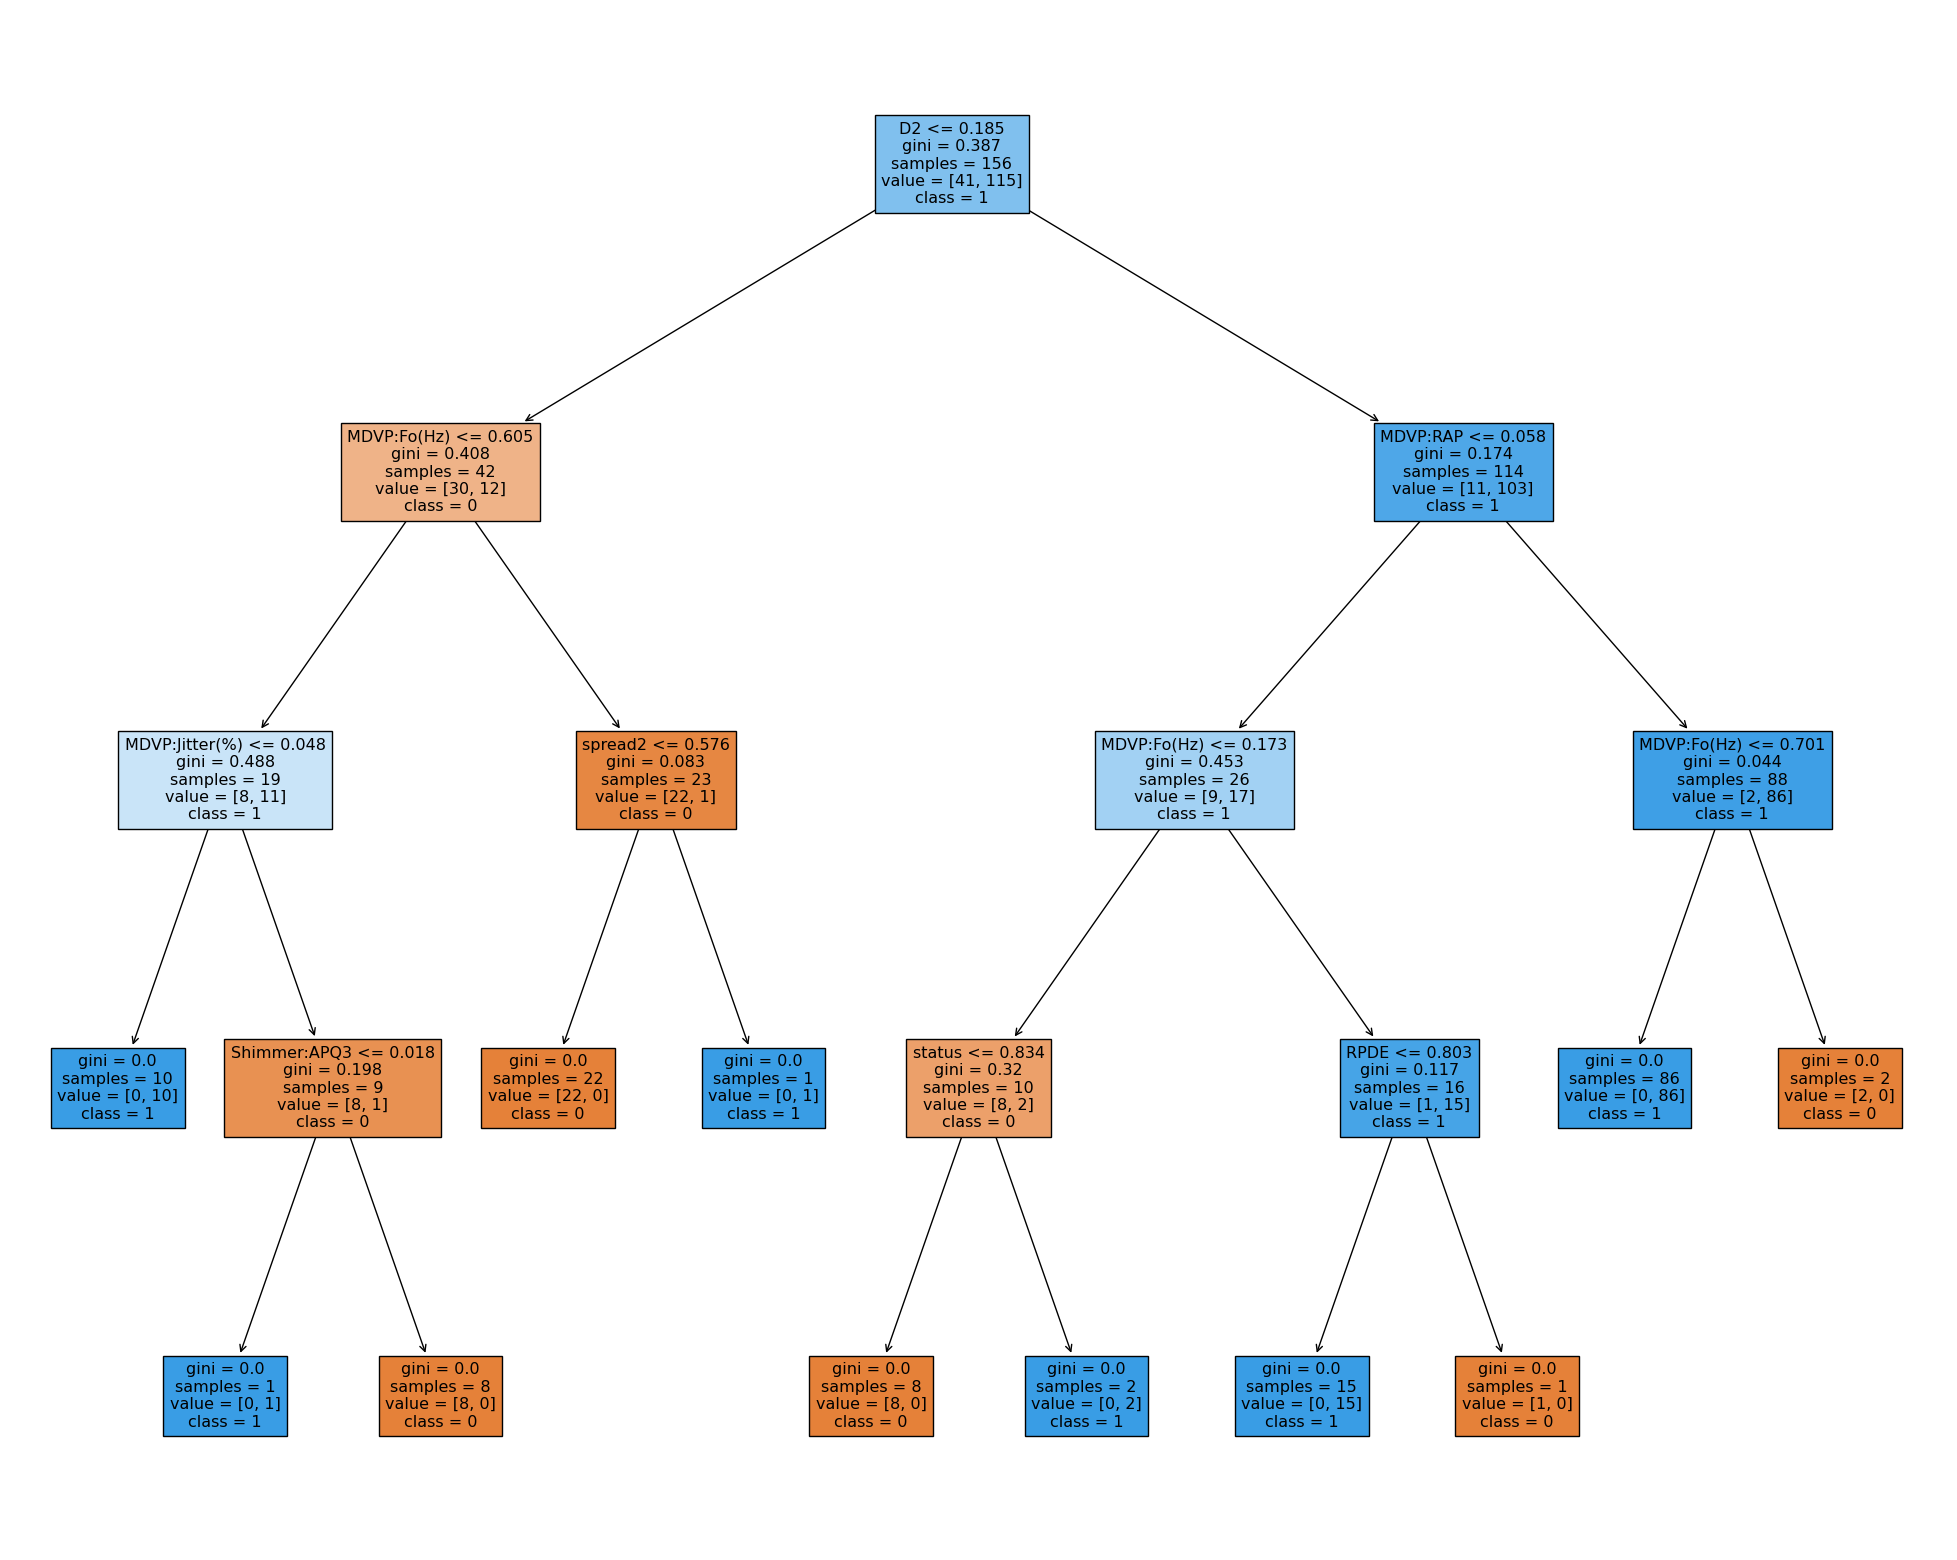

In [ ]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in data.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

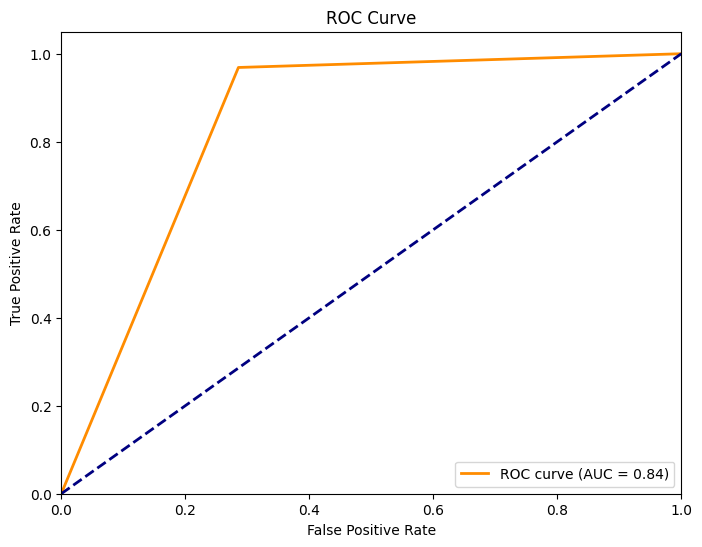

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_DTC = DTC.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_DTC)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_test, y_pred_prob_DTC)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#[4] Random Forest Classifier :

--------------------------------------------------------------------------------
Random Forest Classifier
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 90.96
 ❖ Testing Accuracy Score :  92.31
 • Precision Score is : 93.94
 • Recall Score is : 96.88
 • F1-Score Score is : 95.38
--------------------------------------------------------------------------------


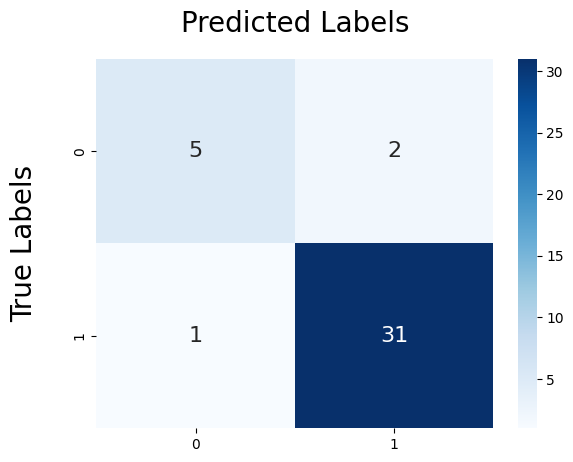

--------------------------------------------------------------------------------


In [ ]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

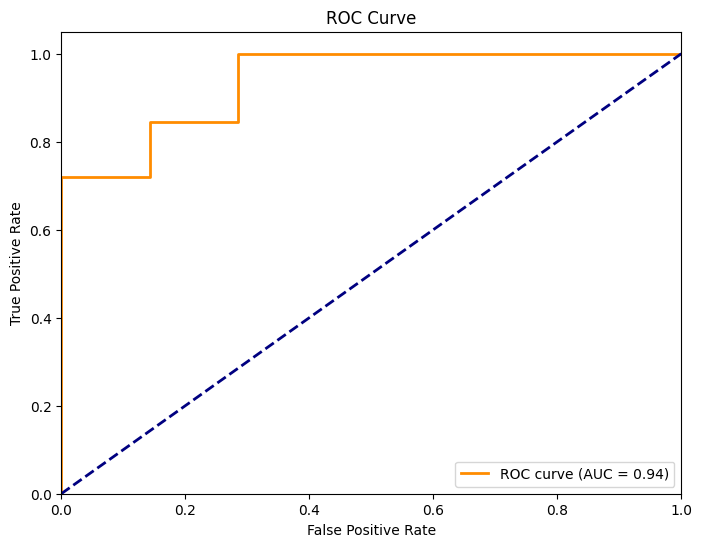

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_RFC = RFC.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_RFC)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_test, y_pred_prob_RFC)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#[5] Key- Nearest Neighbor :

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


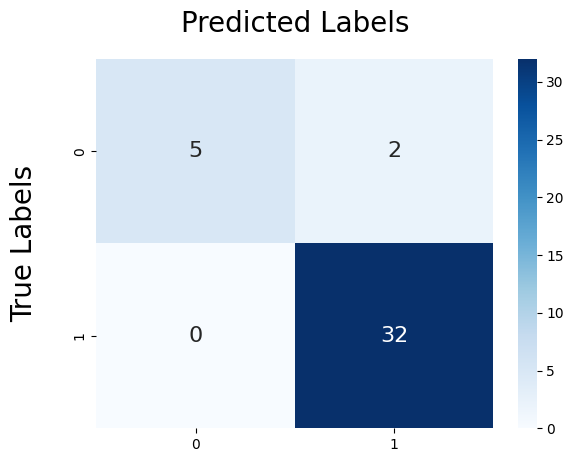

--------------------------------------------------------------------------------


In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

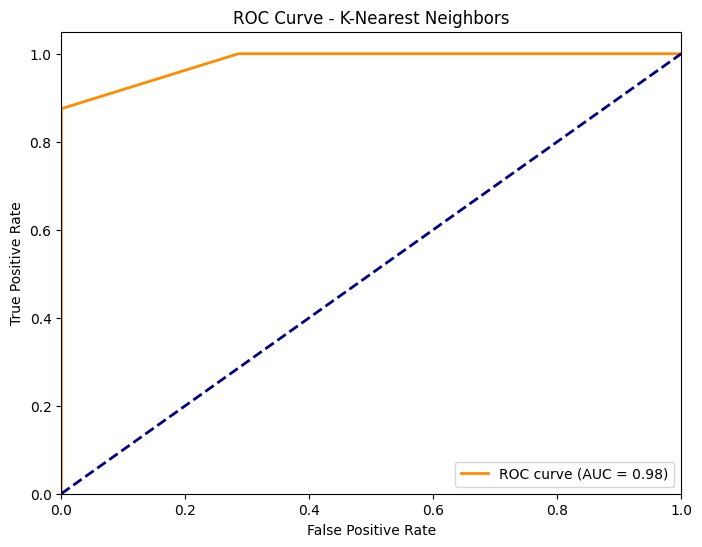

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_KNN = KNN.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_KNN)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_test, y_pred_prob_KNN)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()


#Result

In [ ]:
results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},

    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},

    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},

    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)},

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},

]
results = pd.DataFrame(results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[3,4], :])
print("Results without balancing the dataset : ")
print('-'*70)
results

Results without balancing the dataset : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.911765,0.968750,0.939394,0.897436
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


# 2nd Scenario : where the models will be trained and evaluated on the oversampled dataset.


#[1] Logistic Regression :

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  80.0
 • Cross Validation Score : 77.46
 ❖ Testing Accuracy Score :  84.75
 • Precision Score is : 85.71
 • Recall Score is : 82.76
 • F1-Score Score is : 84.21
--------------------------------------------------------------------------------


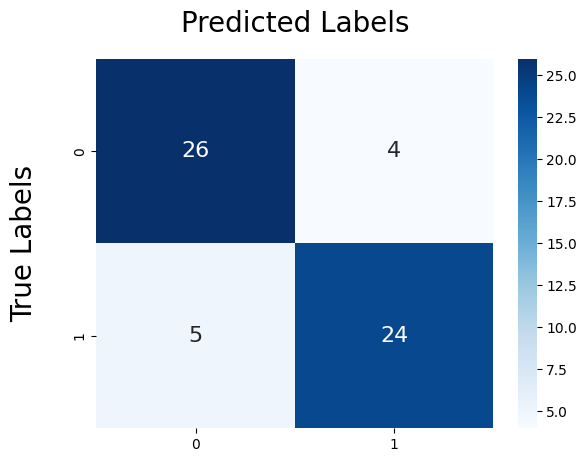

--------------------------------------------------------------------------------


In [ ]:
LR.fit(X_smote_train_scaled,y_smote_train)
y_pred_LR_smote = LR.predict(X_smote_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

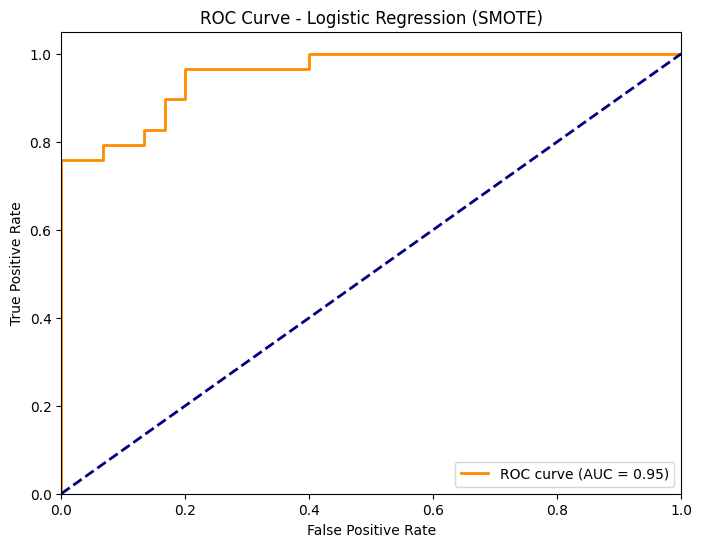

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_LR_smote = LR.predict_proba(X_smote_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_smote_test, y_pred_prob_LR_smote)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_smote_test, y_pred_prob_LR_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (SMOTE)')
plt.legend(loc='lower right')
plt.show()


#[2] Support Vector Machine :

--------------------------------------------------------------------------------
Support vector machine :
----------------

 • Training Accuracy Score :  83.4
 • Cross Validation Score : 79.22
 ❖ Testing Accuracy Score :  88.14
 • Precision Score is : 89.29
 • Recall Score is : 86.21
 • F1-Score Score is : 87.72
--------------------------------------------------------------------------------


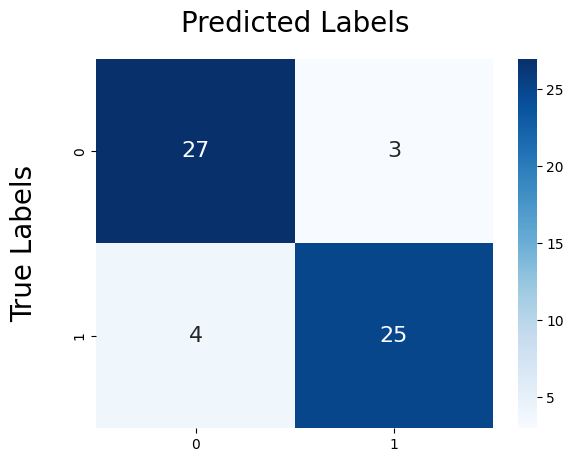

--------------------------------------------------------------------------------


In [ ]:
SVM.fit(X_smote_train_scaled,y_smote_train)
y_pred_SVM_smote = SVM.predict(X_smote_test_scaled)
print('-'*80)
print("Support vector machine :")
print("-"*16)
Evaluate_Performance(SVM, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

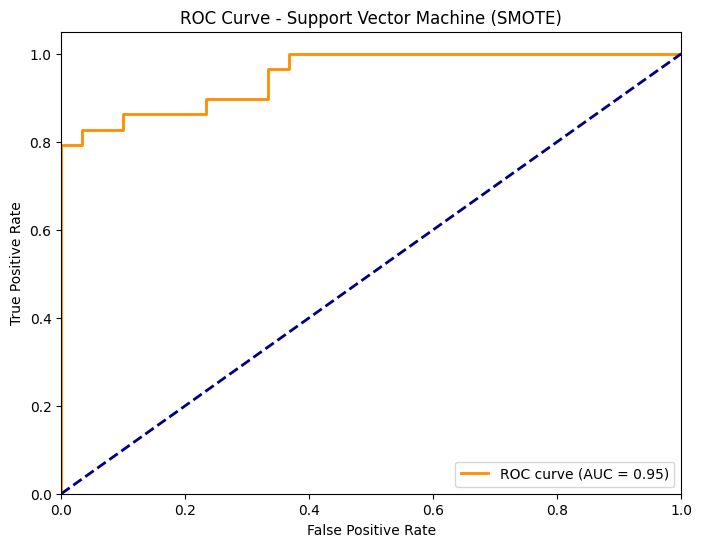

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_SVM_smote = SVM.predict_proba(X_smote_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_smote_test, y_pred_prob_SVM_smote)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_smote_test, y_pred_prob_SVM_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine (SMOTE)')
plt.legend(loc='lower right')
plt.show()


#[3] Decision Tree :


--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 89.35
 ❖ Testing Accuracy Score :  98.31
 • Precision Score is : 100.0
 • Recall Score is : 96.55
 • F1-Score Score is : 98.25
--------------------------------------------------------------------------------


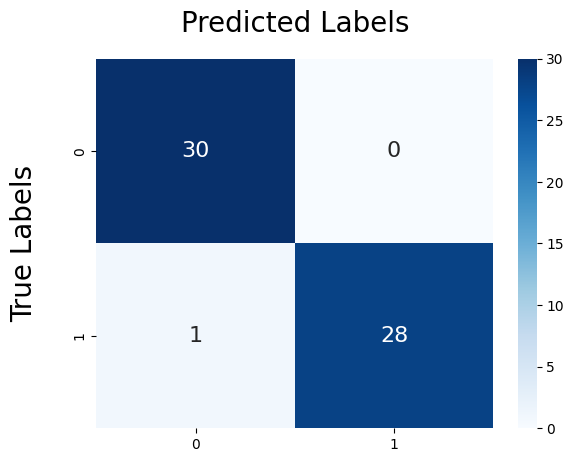

--------------------------------------------------------------------------------
--> Tree's Depth :  6 

DECISION TREE :


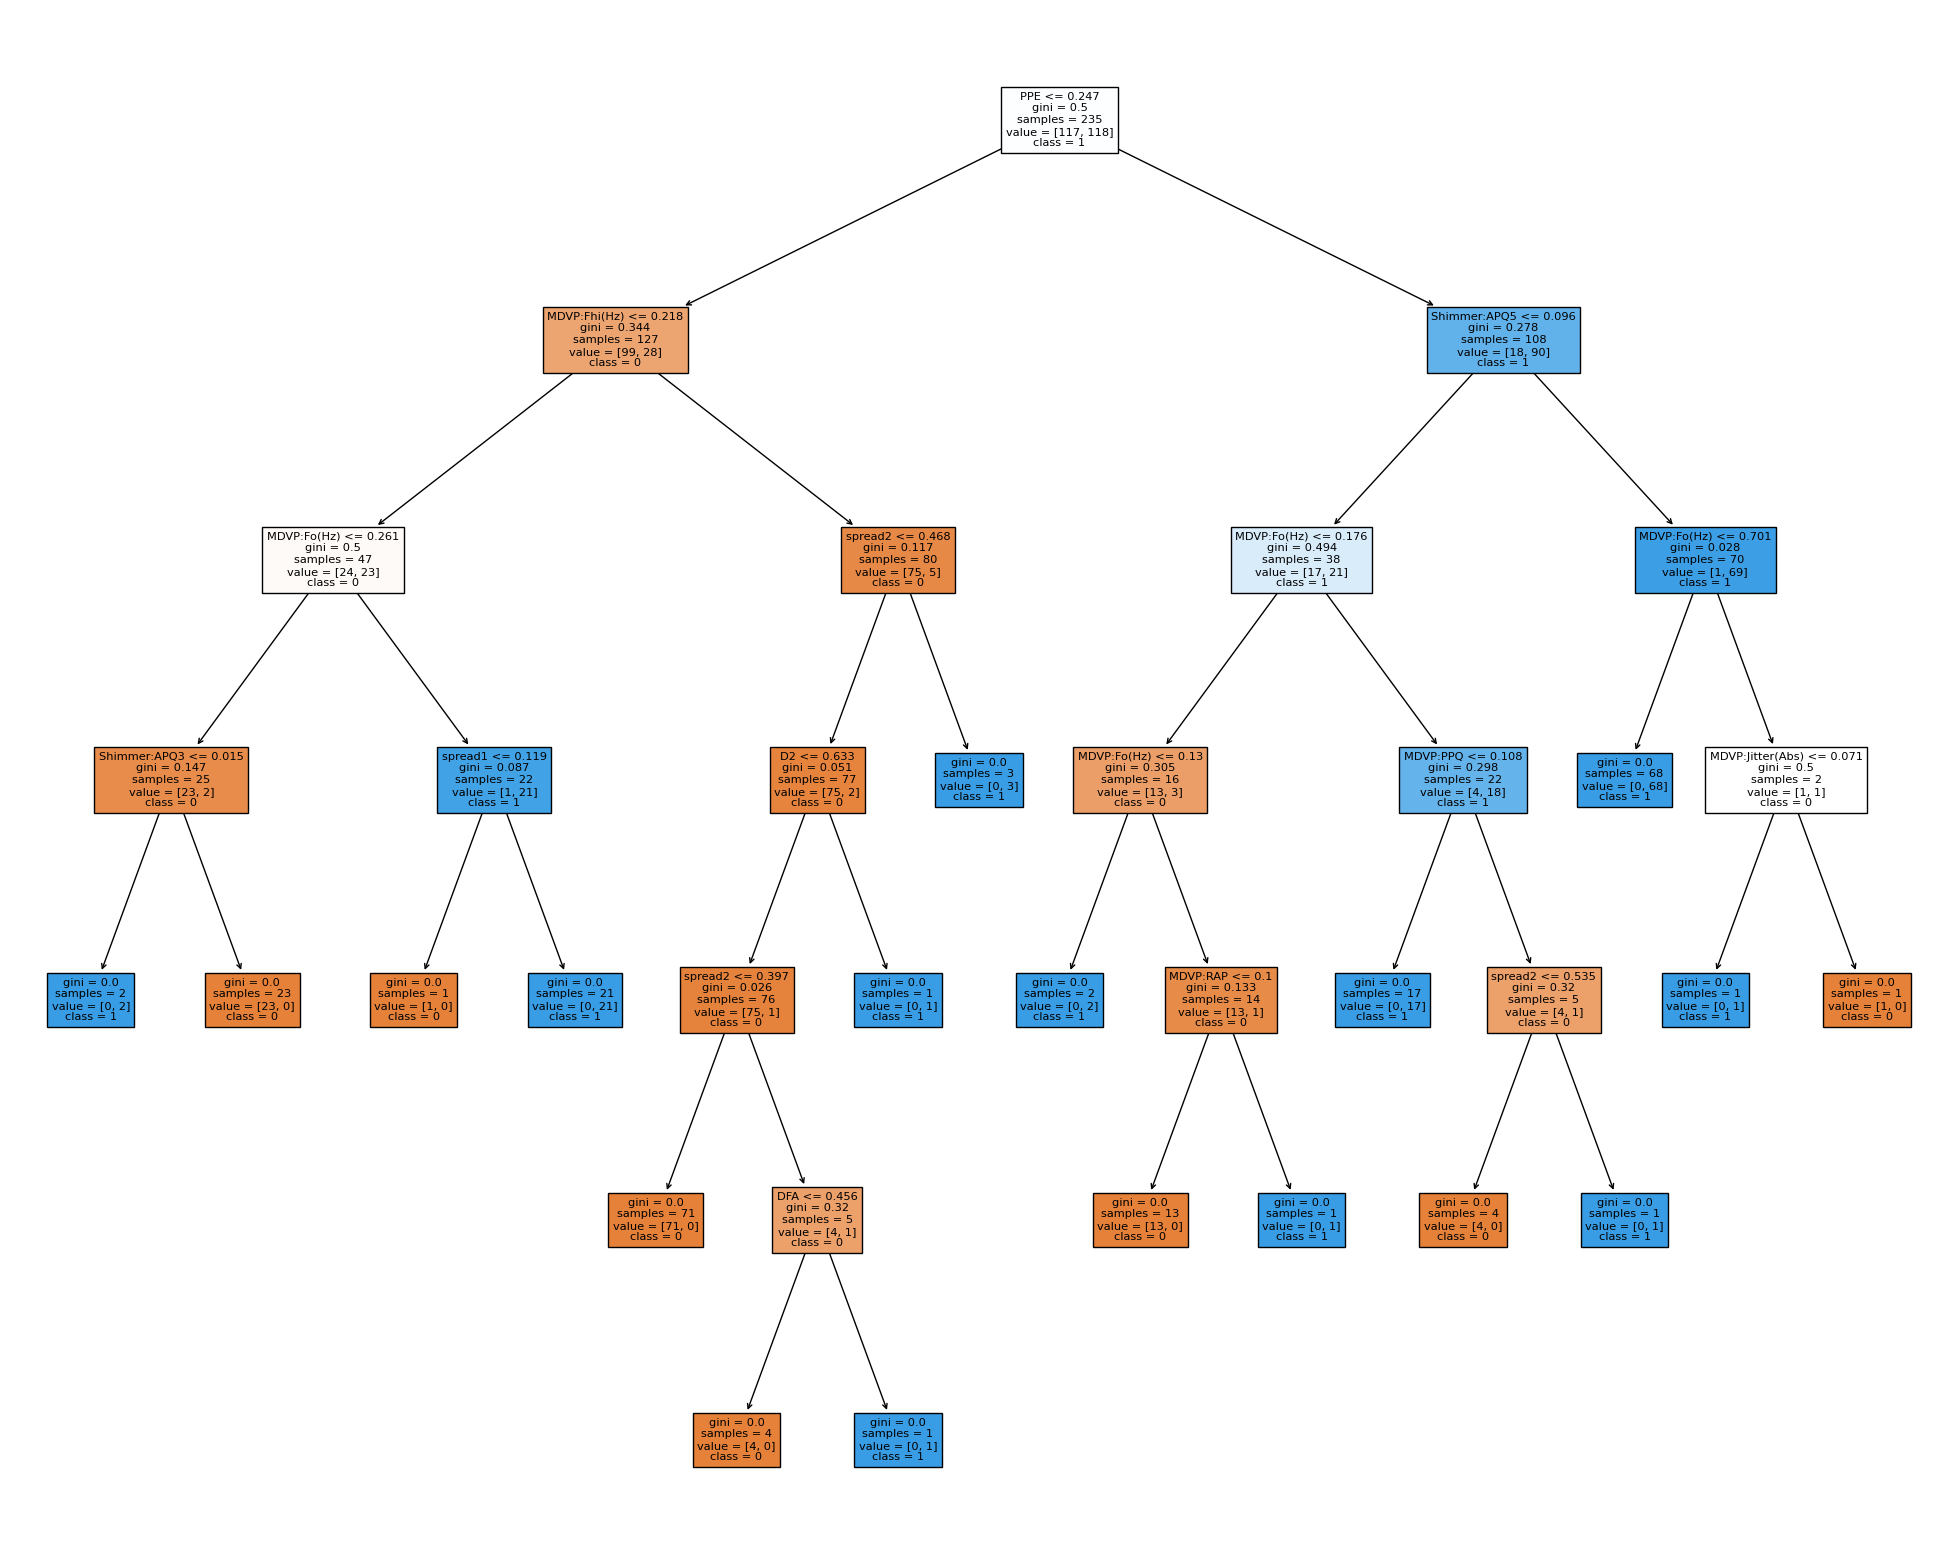

In [ ]:
DTC = DecisionTreeClassifier(criterion='gini')
DTC.fit(X_smote_train_scaled,y_smote_train)
y_pred_DTC_smote = DTC.predict(X_smote_test_scaled)
print('-'*80)
print("Decision Tree Classifier :")
print("-"*16)
Evaluate_Performance(DTC, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)
print( '--> Tree\'s Depth : ',DTC.tree_.max_depth,'\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in smote_data.columns], class_names=['0','1'], filled=True)
plt.show()

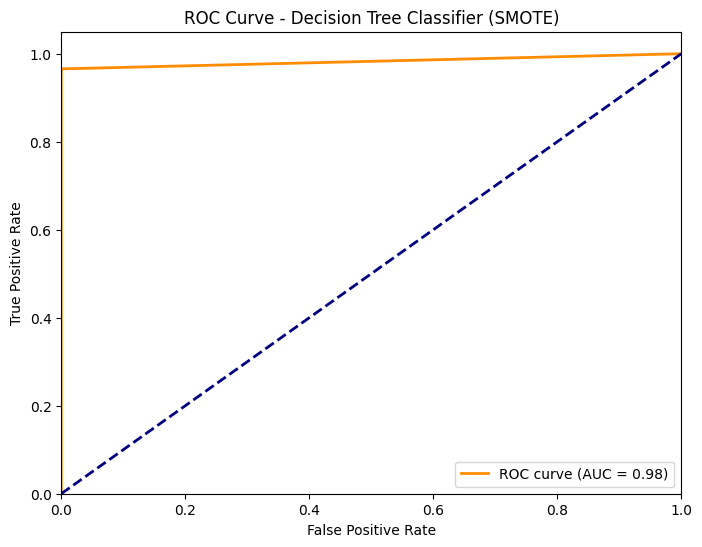

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_DTC_smote = DTC.predict_proba(X_smote_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_smote_test, y_pred_prob_DTC_smote)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_smote_test, y_pred_prob_DTC_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier (SMOTE)')
plt.legend(loc='lower right')
plt.show()


#[4] Random Forest Classifier :

--------------------------------------------------------------------------------
Random Forest Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 93.19
 ❖ Testing Accuracy Score :  100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0
--------------------------------------------------------------------------------


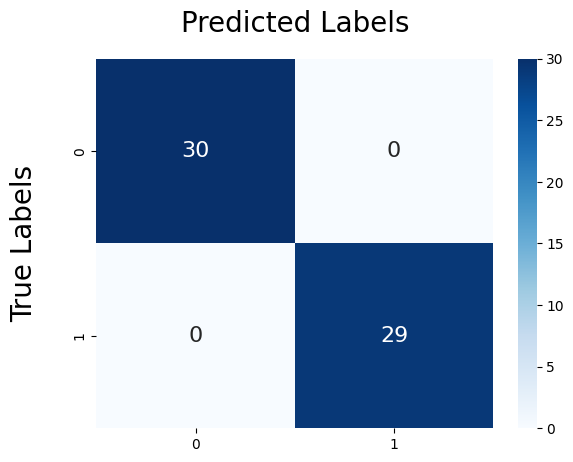

--------------------------------------------------------------------------------


In [ ]:
RFC.fit(X_smote_train_scaled,y_smote_train)
y_pred_RFC_smote = RFC.predict(X_smote_test_scaled)
print('-'*80)
print("Random Forest Classifier :")
print("-"*16)
Evaluate_Performance(RFC, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

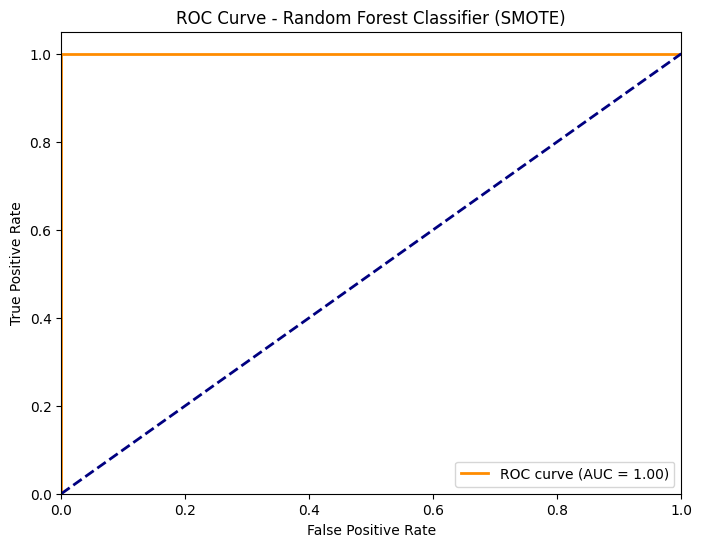

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_RFC_smote = RFC.predict_proba(X_smote_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_smote_test, y_pred_prob_RFC_smote)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_smote_test, y_pred_prob_RFC_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier (SMOTE)')
plt.legend(loc='lower right')
plt.show()


#[5] Key- Nearest Neighbor :

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 96.2
 ❖ Testing Accuracy Score :  98.31
 • Precision Score is : 100.0
 • Recall Score is : 96.55
 • F1-Score Score is : 98.25
--------------------------------------------------------------------------------


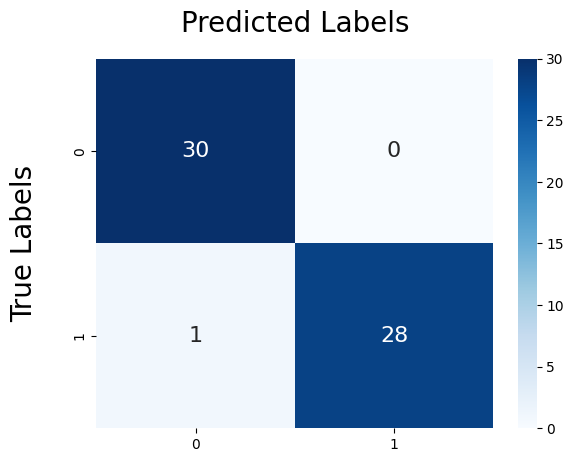

--------------------------------------------------------------------------------


In [ ]:
KNN = KNeighborsClassifier( n_neighbors = 1 )
KNN.fit(X_smote_train_scaled,y_smote_train)
y_pred_KNN_smote = KNN.predict(X_smote_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

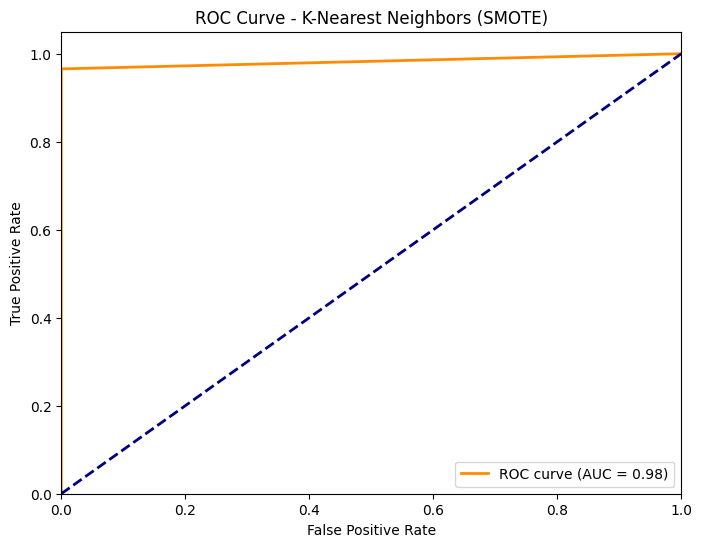

In [ ]:
# Get the predicted probabilities for the positive class
y_pred_prob_KNN_smote = KNN.predict_proba(X_smote_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_smote_test, y_pred_prob_KNN_smote)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_smote_test, y_pred_prob_KNN_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors (SMOTE)')
plt.legend(loc='lower right')
plt.show()


#Results after balancing the dataset

In [ ]:
results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_smote_test, y_pred_LR_smote) , 'Recall': recall_score(y_smote_test, y_pred_LR_smote) ,
     'F1-Score': f1_score(y_smote_test, y_pred_LR_smote) ,'Training Accuracy': LR.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_LR_smote)},

    {'Model': 'Support Vector Machine(rbf)', 'Precision': precision_score(y_smote_test, y_pred_SVM_smote), 'Recall': recall_score(y_smote_test, y_pred_SVM_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_SVM_smote),'Training Accuracy': SVM.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_SVM_smote)},

    {'Model': 'Decision Tree', 'Precision': precision_score(y_smote_test, y_pred_DTC_smote), 'Recall': recall_score(y_smote_test, y_pred_DTC_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_DTC_smote),'Training Accuracy': DTC.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_DTC_smote)},

    {'Model': 'Random Forest', 'Precision': precision_score(y_smote_test, y_pred_RFC_smote), 'Recall': recall_score(y_smote_test, y_pred_RFC_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_RFC_smote),'Training Accuracy': RFC.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_RFC_smote)},

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_smote_test, y_pred_KNN_smote), 'Recall': recall_score(y_smote_test, y_pred_KNN_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_KNN_smote),'Training Accuracy': KNN.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_KNN_smote)},
]
smote_results = pd.DataFrame(results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[4], :])
print("Results after balancing the dataset using SMOTE Over Sampler technique : ")
print('-'*70)
smote_results

Results after balancing the dataset using SMOTE Over Sampler technique : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Training Accuracy,Test Accuracy
0,Logistic Regression,0.857143,0.827586,0.842105,0.800000,0.847458
1,Support Vector Machine(rbf),0.892857,0.862069,0.877193,0.834043,0.881356
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
4,K-Nearest Neighbor,1.000000,0.965517,0.982456,1.000000,0.983051
